In [18]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import random

In [19]:
#Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [21]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match
url

Please enter the match id: 14951


'https://understat.com/match/14951'

In [22]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [23]:
#get only the shotsData
strings = scripts[1].string

In [24]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22397932\\x22,\\x22minute\\x22\\x3A\\x221\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.8080000305175781\\x22,\\x22Y\\x22\\x3A\\x220.29200000762939454\\x22,\\x22xG\\x22\\x3A\\x220.02579367160797119\\x22,\\x22player\\x22\\x3A\\x22Antonio\\x20Puertas\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x227863\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2214951\\x22,\\x22h_team\\x22\\x3A\\x22Granada\\x22,\\x22a_team\\x22\\x3A\\x22Barcelona\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x224\\x22,\\x22date\\x22\\x3A\\x222021\\x2D01\\x2D09\\x2017\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Roberto\\x20Soldado\\x22,\\x22lastAction\\x22\\x3A\\x22BallRecovery\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22397936\\x22,\\x22minute\\x22\\x3A\\x2216\\x22,\\x2

In [25]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [26]:
data

{'h': [{'id': '397932',
   'minute': '1',
   'result': 'SavedShot',
   'X': '0.8080000305175781',
   'Y': '0.29200000762939454',
   'xG': '0.02579367160797119',
   'player': 'Antonio Puertas',
   'h_a': 'h',
   'player_id': '7863',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'RightFoot',
   'match_id': '14951',
   'h_team': 'Granada',
   'a_team': 'Barcelona',
   'h_goals': '0',
   'a_goals': '4',
   'date': '2021-01-09 17:30:00',
   'player_assisted': 'Roberto Soldado',
   'lastAction': 'BallRecovery'},
  {'id': '397936',
   'minute': '16',
   'result': 'BlockedShot',
   'X': '0.735',
   'Y': '0.38',
   'xG': '0.013347496278584003',
   'player': 'Antonio Puertas',
   'h_a': 'h',
   'player_id': '7863',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'LeftFoot',
   'match_id': '14951',
   'h_team': 'Granada',
   'a_team': 'Barcelona',
   'h_goals': '0',
   'a_goals': '4',
   'date': '2021-01-09 17:30:00',
   'player_assisted': None,
   'lastAction': 

In [27]:
player = []
x = []
y = []
xG = []
result = []
team = []
minute = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'minute':
            minute.append(data_home[index][key])   
        if key == 'player':
            player.append(data_home[index][key])       
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'player':
            player.append(data_away[index][key])  
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])

In [28]:
col_names = ['player','team','minute','x','y','xG','result']
df = pd.DataFrame([player,team,minute,x,y,xG,result],index=col_names)
df = df.T

df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
df['xG'] = pd.to_numeric(df['xG'])
df['minute'] = pd.to_numeric(df['minute'])

df['x_conv'] = (df.x/100) * 105
df['y_conv'] = (df.y/100) * 68

df['x_conv'] = (df.x_conv)*100
df['y_conv'] = (df.y_conv)*100

df['x'] = (df.x)*100
df['y'] = (df.y)*100

In [29]:
df = df[['player', 'team', 'minute', 'result', 'xG']]
df

,player,team,minute,result,xG
0,Antonio Puertas,Granada,1,SavedShot,0.025794
1,Antonio Puertas,Granada,16,BlockedShot,0.013347
2,Roberto Soldado,Granada,22,MissedShots,0.028072
3,Darwin Machís,Granada,32,SavedShot,0.028387
4,Antonio Puertas,Granada,49,SavedShot,0.083904
5,Darwin Machís,Granada,59,MissedShots,0.245491
6,Kenedy,Granada,80,SavedShot,0.023818
7,Luis Suárez,Granada,84,BlockedShot,0.041626
8,Pedri,Barcelona,10,BlockedShot,0.190218
9,Antoine Griezmann,Barcelona,11,Goal,0.484552


In [49]:
print(df['team'].iloc[0])
print(df['team'].iloc[-1])

Granada
Barcelona


In [33]:
#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


#this finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])
        
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

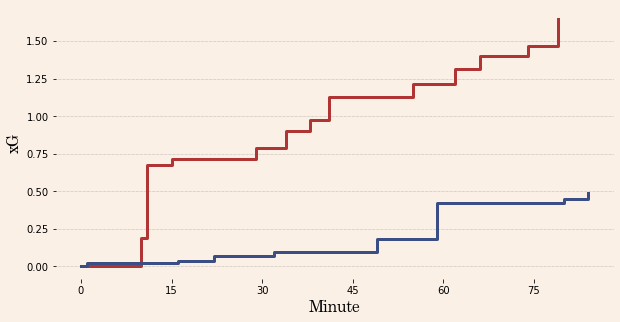

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('linen')
ax.patch.set_facecolor('linen')

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

ax.grid(ls='dotted',lw=.5,color='grey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='AppleMyungjo',color='black',fontsize=16)
plt.ylabel('xG',fontname='AppleMyungjo',color='black',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#b13434',label=ateam,linewidth=3,where='post')
ax.step(x=h_min,y=h_cumulative,color='#3a4e85',label=hteam,linewidth=3,where='post')